<AxesSubplot:xlabel='Date'>

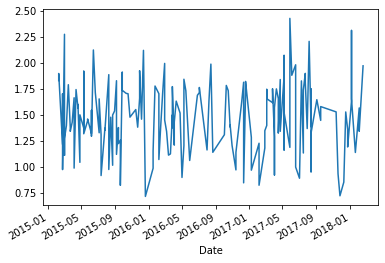

In [5]:
import pandas as pd

df = pd.read_csv('datasets/avocado.csv')

df['Date'] = pd.to_datetime(df['Date'])

albany_df = df[df['region'] == 'Albany']
albany_df.set_index('Date', inplace = True)
albany_df['AveragePrice'].plot()

<AxesSubplot:xlabel='Date'>

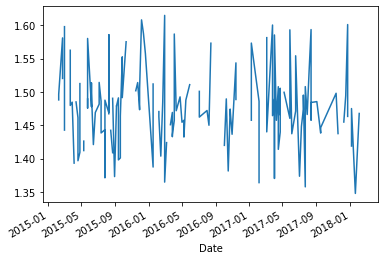

In [6]:
albany_df['AveragePrice'].rolling(25).mean().plot()

e:\installation root\python 3.9.1\lib\site-packages\pandas\core\frame.py:5579: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


<AxesSubplot:xlabel='Date'>

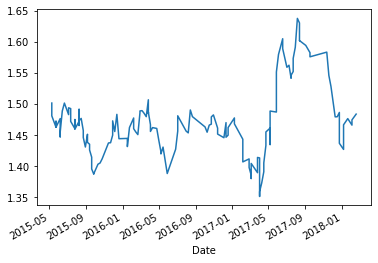

In [7]:
albany_df.sort_index(inplace = True)
albany_df['AveragePrice'].rolling(25).mean().plot()

In [8]:
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()
albany_df.head(3)

<ipython-input-8-f43a0a1c1e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()


,Unnamed: 0,Unnamed: 0.1,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,,
2015-02-08,224745,29.731123,1.831653,72128.762443,669.992400,-10516.844756,530.283582,-291.332185,-5760.798053,373.173270,-186.963299,organic,2015.994552,Albany,NaN
2015-02-08,41923,35.437481,1.898491,-933.252989,-8879.132195,-7466.366921,-216.007372,-7135.669140,-7188.930157,2999.368009,26.552221,organic,2014.986709,Albany,NaN
2015-02-22,193707,45.634175,1.214212,74810.843323,6312.147978,18269.828187,925.676811,7777.413457,2662.218777,-2333.426813,-45.745526,organic,2014.988992,Albany,NaN


In [9]:
albany_df = df.copy()[df['region'] == 'Albany']
albany_df['Date'] = pd.to_datetime(albany_df['Date'])
albany_df.set_index('Date', inplace = True)

In [14]:
# Crazy task for the RAM!
# Duplicate Dates are slowing down the join

graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace = True)
    region_df.sort_index(inplace = True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])

LasVegas
Atlanta
NewOrleansMobile
GrandRapids
WestTexNewMexico
Northeast
Chicago
LosAngeles
Jacksonville
Indianapolis
CincinnatiDayton
Philadelphia
DallasFtWorth
MiamiFtLauderdale
Tampa
BuffaloRochester


In [10]:
import pandas as pd

df = pd.read_csv('datasets/avocado.csv')

df = df.copy()[df['type'] == 'organic']
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by = 'Date', ascending = True, inplace = True)

graph_df = pd.DataFrame()

for region in df['region'].unique():
    print(region)
    region_df = df.copy()[df['region'] == region]
    region_df.set_index('Date', inplace = True)
    region_df.sort_index(inplace = True)
    region_df[f'{region}_price25ma'] = region_df['AveragePrice'].rolling(25).mean()
    
    if graph_df.empty:
        graph_df = region_df[[f'{region}_price25ma']]
    else:
        graph_df = graph_df.join(region_df[f'{region}_price25ma'])
        
graph_df.tail()

SouthCentral
SanFrancisco
GrandRapids
MiamiFtLauderdale
NorthernNewEngland
Denver
Columbus
Plains
HartfordSpringfield
Roanoke
CincinnatiDayton
Detroit
SanDiego
RichmondNorfolk
GreatLakes
Spokane
WestTexNewMexico
Northeast
PhoenixTucson
NewOrleansMobile


,SouthCentral_price25ma,SanFrancisco_price25ma,GrandRapids_price25ma,MiamiFtLauderdale_price25ma,NorthernNewEngland_price25ma,Denver_price25ma,Columbus_price25ma,Plains_price25ma,HartfordSpringfield_price25ma,Roanoke_price25ma,CincinnatiDayton_price25ma,Detroit_price25ma,SanDiego_price25ma,RichmondNorfolk_price25ma,GreatLakes_price25ma,Spokane_price25ma,WestTexNewMexico_price25ma,Northeast_price25ma,PhoenixTucson_price25ma,NewOrleansMobile_price25ma
Date,,,,,,,,,,,,,,,,,,,,
2018-03-25,1.465135,NaN,1.690439,NaN,NaN,NaN,NaN,NaN,NaN,1.599755,1.523823,1.565385,NaN,NaN,NaN,NaN,NaN,NaN,1.516121,1.541429
2018-03-25,1.465135,NaN,1.690439,NaN,NaN,NaN,NaN,NaN,NaN,1.599755,1.523823,1.562988,NaN,NaN,NaN,NaN,NaN,NaN,1.506403,1.551189
2018-03-25,1.465135,NaN,1.690439,NaN,NaN,NaN,NaN,NaN,NaN,1.599755,1.523823,1.562988,NaN,NaN,NaN,NaN,NaN,NaN,1.506403,1.541429
2018-03-25,1.465135,NaN,1.690439,NaN,NaN,NaN,NaN,NaN,NaN,1.599755,1.523823,1.562988,NaN,NaN,NaN,NaN,NaN,NaN,1.516121,1.551189
2018-03-25,1.465135,NaN,1.690439,NaN,NaN,NaN,NaN,NaN,NaN,1.599755,1.523823,1.562988,NaN,NaN,NaN,NaN,NaN,NaN,1.516121,1.541429


<AxesSubplot:xlabel='Date'>

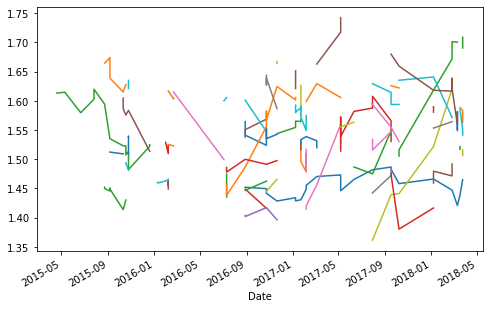

In [11]:
graph_df.plot(figsize = (8, 5), legend = False)